In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eco = pd.read_csv("GDPState.csv")
tot = pd.read_csv("Agg_tot.csv")
unp = pd.read_csv("TotalAgg.csv")

unp = unp[ unp['Rate'] != 'N.A.']
unp = unp[ unp['Year'].isin([2002, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012])]
idx_ = set(tot['Year'])
idx_list = []
for i in idx_:
    idx_list.append(str(i))


eco = eco[ ['Fips', 'Area'] + idx_list ]
tot['STATE2'] = tot['STATE2'].str.capitalize()
eco = eco.melt(id_vars=['Fips', 'Area'], value_vars=idx_list)
eco.columns = ['Fips', 'State', 'Year', 'GDP']
eco['Year'] = eco['Year'].apply(int)
eco.loc[ eco['State'] == 'New Mexico' ,'State'] = 'New mexico'
unp['Rate'] = unp['Rate'].apply(float)
unp['State2'] = unp['State2'].str.capitalize()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
eco.head()

,Fips,State,Year,GDP
0,0,United States,2002,45068
1,1000,Alabama,2002,34068
2,2000,Alaska,2002,60101
3,4000,Arizona,2002,39323
4,5000,Arkansas,2002,32514


In [60]:
tot.head()

,Year,STATE,STATE2,COUNTY,RACE2,AGE5YR,SEX,count,binge,smoke,droc,AGE
0,2002,1,Alabama,Jefferson County,European,1,Male,11,6,6,336,18-24
1,2002,1,Alabama,Jefferson County,European,1,Female,10,5,4,170,18-24
2,2002,1,Alabama,Jefferson County,European,2,Male,6,5,5,238,25-29
3,2002,1,Alabama,Jefferson County,European,2,Female,15,1,2,133,25-29
4,2002,1,Alabama,Jefferson County,European,3,Male,11,6,6,343,30-34


In [61]:
unp.head()

,LAUS CODE,StateFIPS,CountyFIPS,County,State,State2,Year,LaborForce,Employed,Unemployed,Rate
6434,CN0100100000000,1,1,Autauga County,AL,Alabama,2002,"22,094","21,035","1,059",4.8
6435,CN0100300000000,1,3,Baldwin County,AL,Alabama,2002,"69,169","65,691","3,478",5.0
6436,CN0100500000000,1,5,Barbour County,AL,Alabama,2002,"10,971","10,125",846,7.7
6437,CN0100700000000,1,7,Bibb County,AL,Alabama,2002,"8,933","8,309",624,7.0
6438,CN0100900000000,1,9,Blount County,AL,Alabama,2002,"25,757","24,366","1,391",5.4


In [64]:
tot_group = tot.groupby(['Year'])
tot_alc1 = pd.DataFrame({'alc1' : tot_group['droc'].sum() / tot_group['count'].sum() / 100 }).reset_index()
tot_alc2 = pd.DataFrame({'alc2' :tot_group['binge'].sum() / tot_group['count'].sum()}).reset_index()
tot_smk = pd.DataFrame({'smk' :tot_group['smoke'].sum() / tot_group['count'].sum()}).reset_index()

tot_smk.head()

,Year,smk
0,2002,0.478737
1,2003,0.474186
2,2004,0.456630
3,2005,0.469080
4,2006,0.464698


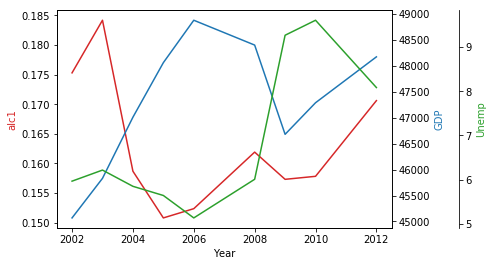

In [65]:
# Vis 0
# For entire country
eco_temp = eco[ eco['State'] == 'United States']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('alc1', color=color)
ax1.plot(tot_alc1['Year'], tot_alc1['alc1'], color=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color=color)
ax2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

color = 'tab:green'
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('Unemp', color=color)
ax3.plot(tmp_unp['Year'], tmp_unp['Rate'], color=color)

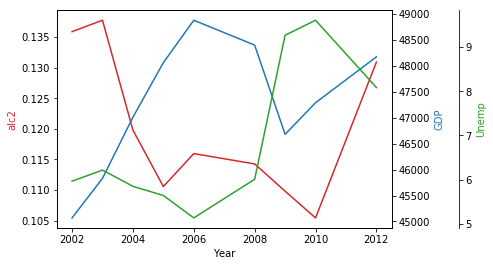

In [66]:
# Vis 0
# For entire country
eco_temp = eco[ eco['State'] == 'United States']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('alc2', color=color)
ax1.plot(tot_alc2['Year'], tot_alc2['alc2'], color=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color=color)
ax2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

color = 'tab:green'
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('Unemp', color=color)
ax3.plot(tmp_unp['Year'], tmp_unp['Rate'], color=color)

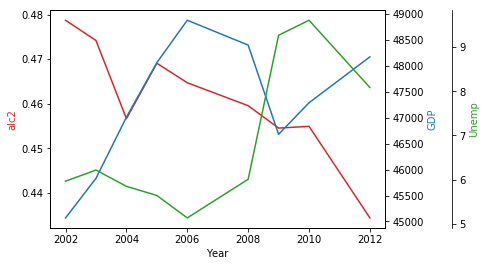

In [67]:
# Vis 0
# For entire country
eco_temp = eco[ eco['State'] == 'United States']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('alc2', color=color)
ax1.plot(tot_smk['Year'], tot_smk['smk'], color=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color=color)
ax2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

color = 'tab:green'
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('Unemp', color=color)
ax3.plot(tmp_unp['Year'], tmp_unp['Rate'], color=color)

In [68]:
# by 9 states
# vis prep

tot_9states = tot[ tot['STATE2'].isin(['California', 'Connecticut', 'Hawaii', 'Washington', 'Iowa', 
                                      'Georgia', 'Michigan', 'New mexico', 'Utah'])]

state9_group = tot_9states.groupby(['Year', 'STATE2']) 

state_alc1 = pd.DataFrame({'alc1' : state9_group['droc'].sum() / state9_group['count'].sum() / 100 }).reset_index()
state_alc2 = pd.DataFrame({'alc2' :state9_group['binge'].sum() / state9_group['count'].sum()}).reset_index()
state_smk = pd.DataFrame({'smk' :state9_group['smoke'].sum() / state9_group['count'].sum()}).reset_index()

state_alc1.head()

,Year,STATE2,alc1
0,2002,California,0.153780
1,2002,Connecticut,0.213578
2,2002,Georgia,0.158559
3,2002,Hawaii,0.157005
4,2002,Iowa,0.158246


In [69]:
# by 9 states

unp_9 = unp[unp['State2'].isin(['California', 'Connecticut', 'Hawaii', 'Washington', 'Iowa', 
                                      'Georgia', 'Michigan', 'New mexico', 'Utah'])]

unp_9group = pd.DataFrame({'Rate' :unp_9.groupby(['Year', 'State2'])['Rate'].mean()}).reset_index()

unp_9group.head()

,Year,State2,Rate
0,2002,California,7.575862
1,2002,Connecticut,4.150000
2,2002,Georgia,5.428302
3,2002,Hawaii,4.400000
4,2002,Iowa,4.100000


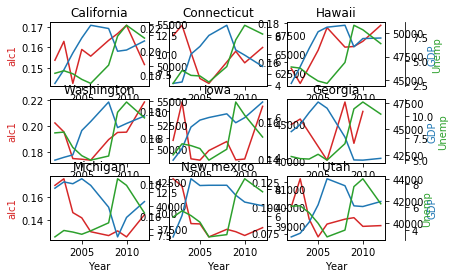

In [70]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

state = ['California', 'Connecticut', 'Hawaii', 'Washington', 'Iowa',
         'Georgia', 'Michigan', 'New mexico', 'Utah']

for i, j, k in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9], state, range(9)):
    eco_temp = eco[eco['State'] == j]
    state_temp = state_alc1[state_alc1['STATE2'] == j]
    ump_temp = unp_9group[unp_9group['State2'] == j]

    color = 'tab:red'
    if (k in [6, 7, 8]):
        i.set_xlabel('Year')
    if (k in [0, 3, 6]):
        i.set_ylabel('alc1', color=color)
    i.plot(state_temp['Year'], state_temp['alc1'], color=color)
    color = 'tab:blue'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.set_ylabel('GDP', color=color)
    i_2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

    color = 'tab:green'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.spines["right"].set_position(("axes", 1.2))
        i_2.set_ylabel('Unemp', color=color)
    i_2.plot(ump_temp['Year'], ump_temp['Rate'], color=color)

    plt.title(j)


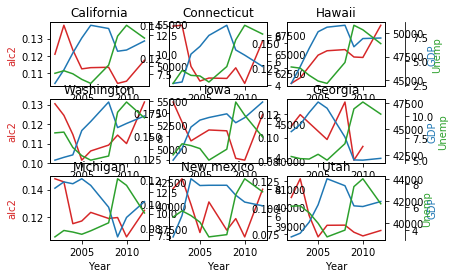

In [71]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

state = ['California', 'Connecticut', 'Hawaii', 'Washington', 'Iowa',
         'Georgia', 'Michigan', 'New mexico', 'Utah']

for i, j, k in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9], state, range(9)):
    eco_temp = eco[eco['State'] == j]
    state_temp = state_alc2[state_alc2['STATE2'] == j]
    ump_temp = unp_9group[unp_9group['State2'] == j]

    color = 'tab:red'
    if (k in [6, 7, 8]):
        i.set_xlabel('Year')
    if (k in [0, 3, 6]):
        i.set_ylabel('alc2', color=color)
    i.plot(state_temp['Year'], state_temp['alc2'], color=color)
    color = 'tab:blue'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.set_ylabel('GDP', color=color)
    i_2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

    color = 'tab:green'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.spines["right"].set_position(("axes", 1.2))
        i_2.set_ylabel('Unemp', color=color)
    i_2.plot(ump_temp['Year'], ump_temp['Rate'], color=color)

    plt.title(j)

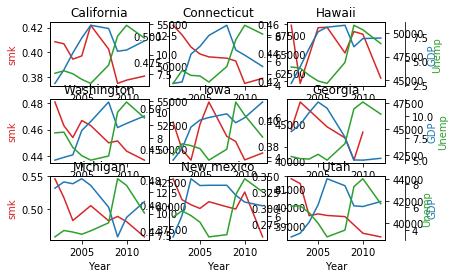

In [72]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

state = ['California', 'Connecticut', 'Hawaii', 'Washington', 'Iowa',
         'Georgia', 'Michigan', 'New mexico', 'Utah']

for i, j, k in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9], state, range(9)):
    eco_temp = eco[eco['State'] == j]
    state_temp = state_smk[state_smk['STATE2'] == j]
    ump_temp = unp_9group[unp_9group['State2'] == j]

    color = 'tab:red'
    if (k in [6, 7, 8]):
        i.set_xlabel('Year')
    if (k in [0, 3, 6]):
        i.set_ylabel('smk', color=color)
    i.plot(state_temp['Year'], state_temp['smk'], color=color)
    color = 'tab:blue'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.set_ylabel('GDP', color=color)
    i_2.plot(eco_temp['Year'], eco_temp['GDP'], color=color)

    color = 'tab:green'
    i_2 = i.twinx()
    if (k in [2, 5, 8]):
        i_2.spines["right"].set_position(("axes", 1.2))
        i_2.set_ylabel('Unemp', color=color)
    i_2.plot(ump_temp['Year'], ump_temp['Rate'], color=color)

    plt.title(j)
plt.show()